In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1 Exploratory Data Analysis
### Read Datasets into dataframes

In [2]:
data_20170101_20181130 = pd.read_csv('./datasets/TaiPower_20170101_20181130.csv')
data_20180101_20190131 = pd.read_csv('./datasets/TaiPower_20180101_20190131.csv')

### Seperate 2017 data

In [3]:
data_2017 = data_20170101_20181130[data_20170101_20181130['日期'] <= 20171231]

In [4]:
data_2017.head()

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),備轉容量率(%),工業用電(百萬度),民生用電(百萬度),核一#1(萬瓩),核一#2(萬瓩),核二#1(萬瓩),...,大觀二,明潭,碧海,立霧,龍澗,卓蘭,水里,其他小水力,風力發電,太陽能發電
0,20170101,24957,22886,2071,9.05,268.503,196.229,0,62.8,0.0,...,28.6,65.9,0.0,0.0,0.6,2.0,0.0,6.2,12.2,0.0
1,20170102,26035,24483,1552,6.34,280.534,205.022,0,62.8,0.0,...,49.3,94.0,0.0,0.0,0.7,2.2,0.0,6.0,12.7,0.0
2,20170103,29152,28131,1021,3.63,320.449,234.193,0,62.7,0.0,...,39.5,68.3,0.0,0.0,0.4,3.9,0.0,4.0,25.2,0.0
3,20170104,29757,28485,1272,4.47,329.623,240.898,0,62.8,0.0,...,40.9,68.3,0.0,0.0,0.4,3.1,0.0,15.9,9.3,0.0
4,20170105,30065,28336,1729,6.10,330.137,241.273,0,62.8,0.0,...,26.3,61.5,0.0,0.0,0.3,2.1,0.0,9.3,6.5,0.0


### Seperate 2018 data

In [5]:
data_2018 = data_20180101_20190131[data_20180101_20190131['日期'] <= 20181231]

In [6]:
data_2018.head()

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),備轉容量率(%),工業用電(百萬度),民生用電(百萬度),核一#1(萬瓩),核一#2(萬瓩),核二#1(萬瓩),...,大觀二,明潭,碧海,立霧,龍澗,卓蘭,水里,其他小水力,風力發電,太陽能發電
0,20180101,25708.0,23638,2070.0,8.76,279.707,189.179,0,0,98.8,...,29.4,49.5,2.7,1.6,4.2,3.0,0.0,15.5,35.1,0.0
1,20180102,29536.0,27816,1720.0,6.18,321.468,217.423,0,0,98.9,...,31.0,43.9,3.9,1.6,4.4,3.0,0.0,11.6,13.9,0.0
2,20180103,30132.0,28253,1879.0,6.65,334.264,226.077,0,0,98.9,...,24.6,32.3,3.9,1.6,3.9,2.5,0.0,22.3,6.8,0.0
3,20180104,30716.0,28757,1959.0,6.81,337.945,228.567,0,0,98.8,...,14.8,45.2,3.9,1.6,3.9,3.0,0.0,22.1,19.1,0.0
4,20180105,30401.0,28260,2141.0,7.58,337.418,228.211,0,0,98.7,...,15.7,33.3,1.5,1.6,0.0,1.8,0.0,22.1,56.2,0.4


In [7]:
def plot_year(dates, value, title=None): 
    '''
    Args:
        dates: the 'date' column of the data
        value: the value you want to draw
        title: figure title
    Return:
        a plot
    '''
    plt.figure(figsize=(20,4))
    x_axis = pd.to_datetime(dates, format='%Y%m%d')
    plt.plot_date(x_axis, value, '-')
    plt.title(title)

### Plot of 2017 Peak Load

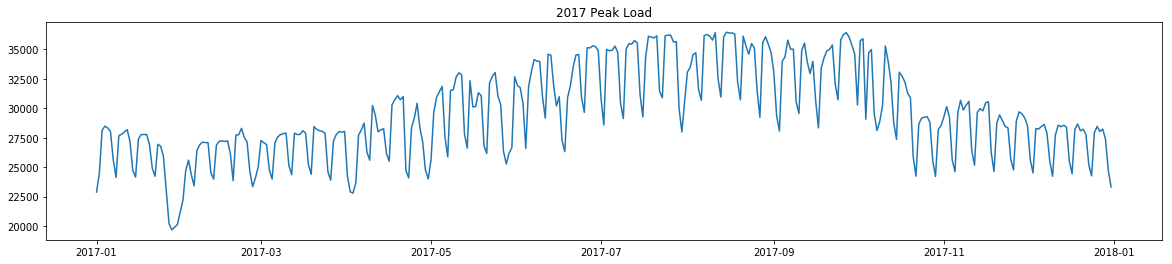

In [8]:
plot_year(data_2017['日期'], data_2017['尖峰負載(MW)'], '2017 Peak Load')
plt.show()

### Plot of 2018 Peak Load

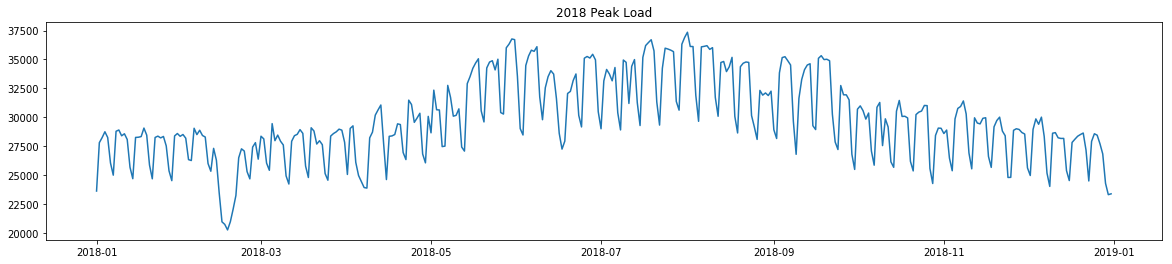

In [9]:
plot_year(data_2018['日期'], data_2018['尖峰負載(MW)'], '2018 Peak Load')
plt.show()

#### The peak load is chaning periodicly, because people use less electricity on weekends

### Plot 2017 data and 2018 data together

There's a significant decline at 30~35 days of 2017 and 45~47 days of 2018, it's because of the Chinese New Year.

As we can see, the data doesn't quite match together because the dates of holidays are different each year.


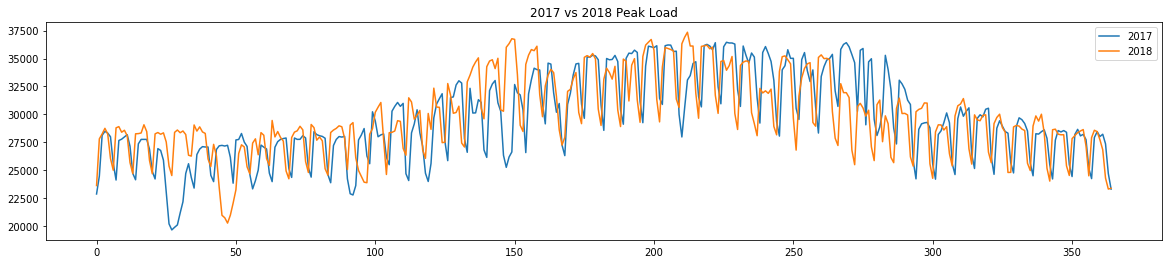

In [10]:
plt.figure(figsize=(20,4))
x_axis = range(0, 365)
plt.plot(x_axis, data_2017['尖峰負載(MW)'], '-')
plt.plot(x_axis, data_2018['尖峰負載(MW)'], '-')
plt.title('2017 vs 2018 Peak Load')
plt.legend(['2017', '2018'])
plt.show()

### Clean up unused data

In [11]:
cols = ['日期', '尖峰負載(MW)']
rename_dict = {'日期':'date', '尖峰負載(MW)':'peak_load'}
data_2017 = data_2017[cols]
data_2018 = data_2018[cols]

data_2017.rename(columns=rename_dict, inplace=True)
data_2018.rename(columns=rename_dict, inplace=True)

### Another dataset

This dataset only provides '備轉容量' and '備轉容量率''

accroding to the fourmula
```
備轉容量(Operating Reserve)＝系統運轉淨尖峰能力－系統瞬時尖峰負載(瞬間值)。
備轉容量率(Percent Operating Reserve)＝（系統運轉淨尖峰供電能力－系統瞬時尖峰負載(瞬間值)）÷系統瞬時尖峰負載(瞬間值)×100%

```
So that we can compute peak load as
```
系統瞬時尖峰負載(瞬間值) = 備轉容量(Operating Reserve) / 備轉容量率(Percent Operating Reserve) * 100%
```

In [12]:
data_20140101_20171231 = pd.read_csv('./datasets/Taipower_20140101_20171231.csv')
data_2014_2016 = pd.DataFrame()
data_2014_2016['date'] = pd.to_datetime(data_20140101_20171231['日期'], format='%Y/%m/%d').dt.strftime("%Y%m%d")

In [13]:
data_2014_2016['peak_load'] = data_20140101_20171231['備轉容量(MW)']/data_20140101_20171231['備轉容量率(%)'] * 100

In [14]:
data_2014_2016['peak_load'] = data_2014_2016['peak_load'].round()

In [15]:
data_2014_2016 = data_2014_2016[:-363]

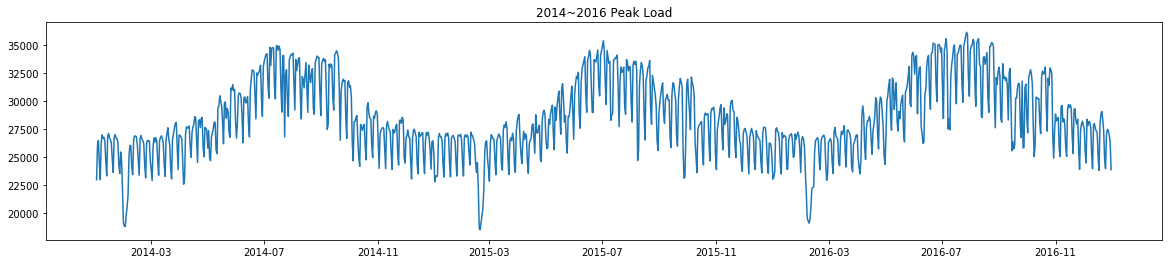

In [16]:
plt.figure(figsize=(20,4))
x_axis = pd.to_datetime(data_2014_2016['date'], format='%Y%m%d')
plt.plot_date(x_axis, data_2014_2016['peak_load'], '-')
plt.title('2014~2016 Peak Load')
plt.show()

As we can see, there's an interesting yearly trend

### Holiday Dataset
This dataset contains main holidays from 2014~2019

It is used for the model to know that these holiday dates are outliers

* new_year
* chinese_new_year
* 228_holiday
* tomb_sweeping_holiday

These are totally hand-crafted by myself LOL

In [17]:
holidays = pd.read_csv('./datasets/holidays.csv')
holidays.head()

,holiday,ds,lower_window,upper_window
0,chinese_new_year,2014-02-01,0,0
1,chinese_new_year,2014-02-02,0,0
2,chinese_new_year,2015-02-19,0,0
3,chinese_new_year,2015-02-20,0,0
4,chinese_new_year,2016-02-08,0,0


### Full dataset 2014~2018

In [18]:
full_data = pd.concat((data_2014_2016, data_2017, data_2018))

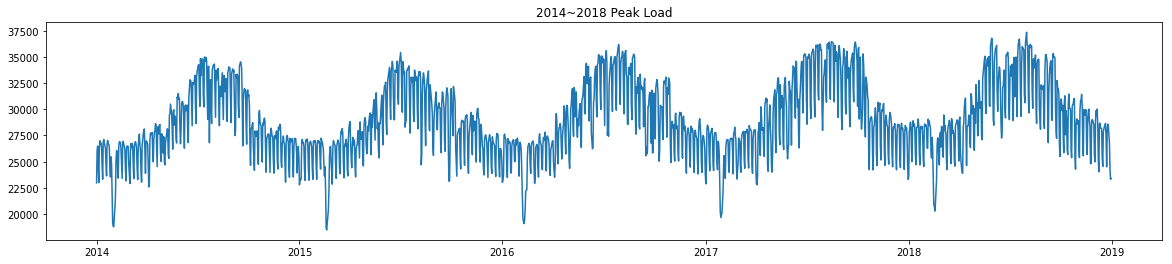

In [19]:
plt.figure(figsize=(20,4))
x_axis = pd.to_datetime(full_data['date'], format='%Y%m%d')
plt.plot_date(x_axis, full_data['peak_load'], '-')
plt.title('2014~2018 Peak Load')
plt.show()

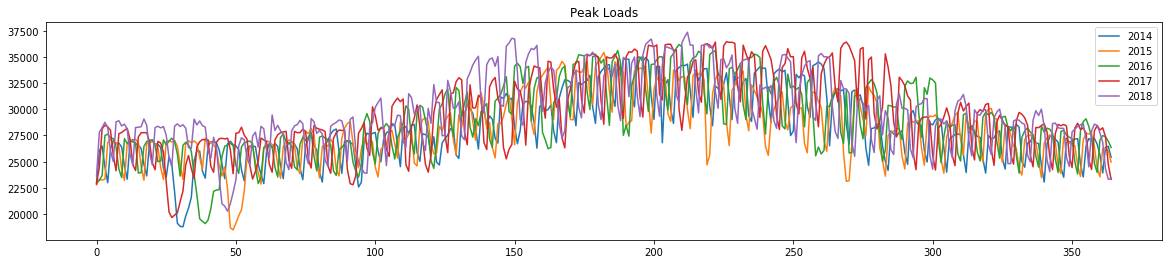

In [20]:
plt.figure(figsize=(20,4))
x_axis = range(0, 365)
plt.plot(x_axis, full_data[:365]['peak_load'], '-')
plt.plot(x_axis, full_data[365:730]['peak_load'], '-')
plt.plot(x_axis, full_data[730:1096].head(365)['peak_load'], '-')
plt.plot(x_axis, full_data[1096:1461]['peak_load'], '-')
plt.plot(x_axis, full_data[1461:]['peak_load'], '-')
plt.title('Peak Loads')
plt.legend(['2014', '2015', '2016', '2017', '2018'])
plt.show()

### Summary
Some observations about the dataset:

* Peak loads are highly related to weekdays. When it comes to weekends, it drops significantly
* Peak loads are related to holidays. For example, Chinese New Year
* Peak loads have a trend yearly and weekly
* There are some outliers, which are too high or too low, due to other conditions, like weather or tempreture

## Part 2 Model

The model has to have the ability to:
* Predict time series data
* Model yearly trend
* Model weekly trend
* Model holidays

Therefore, I choose [Prophet](https://facebook.github.io/prophet/) as my model.

[Article about Prophet](https://research.fb.com/prophet-forecasting-at-scale/)

In [21]:
from fbprophet import Prophet
import numpy as np

In [22]:
# Load simplified datasets
data_2014_2016 = pd.read_csv('./datasets/2014_2016_simple.csv')
data_2017 = pd.read_csv('./datasets/2017_simple.csv')
data_2018 = pd.read_csv('./datasets/2018_simple.csv')
data_2019 = pd.read_csv('./datasets/2019_simple.csv')
holidays = pd.read_csv('./datasets/holidays.csv')

### Use data from 2014~2018 to train the model

In [23]:
# Change the dataset to the specific format for Prophet
data = pd.DataFrame()
all_data = pd.concat([data_2014_2016, data_2017, data_2018], ignore_index = True, sort=False)
all_data.drop('Unnamed: 0', axis=1, inplace=True)

data['ds'] = pd.to_datetime(all_data['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
data['y'] = all_data['peak_load']

### Create a model

In [24]:
m = Prophet(holidays=holidays)
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Define how many days ahead we want to forecast

In [25]:
# We predict next 30 days
future = m.make_future_dataframe(periods=30)

### Use the model to forecast

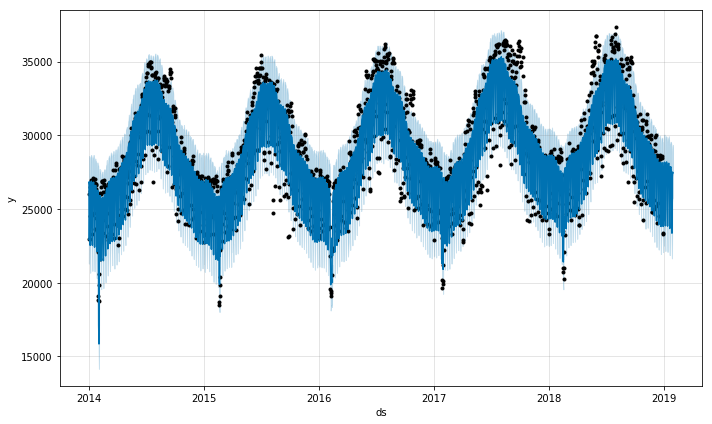

In [26]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

### Plot some interesting features

1. Total tread
2. holiday effect
3. Day of week trend
4. Yearly trend

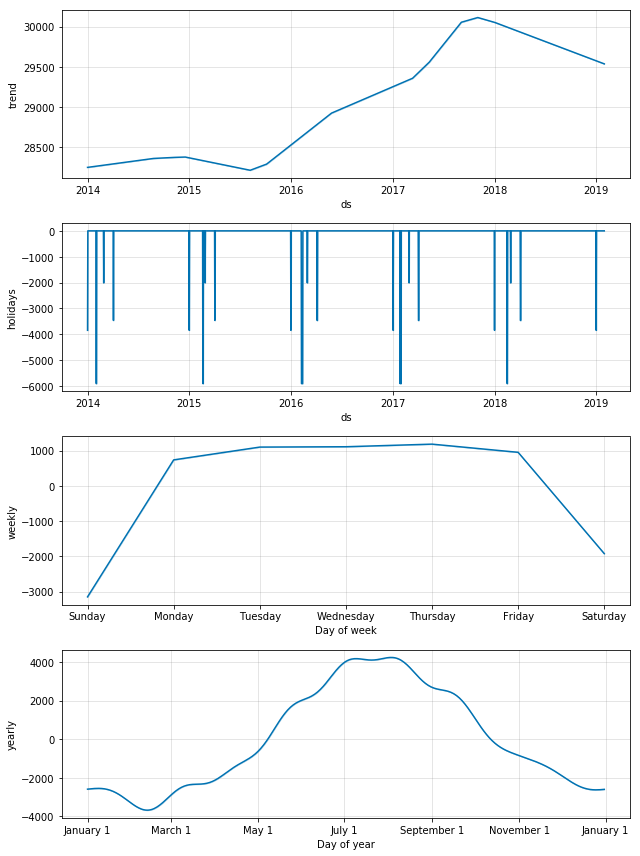

In [27]:
fig2 = m.plot_components(forecast)

### Predictions for next 30 days from 2019/1/1 to 2019/1/30

As we can see, the model is predicting using the Day of Week feature, and it is quite accurate

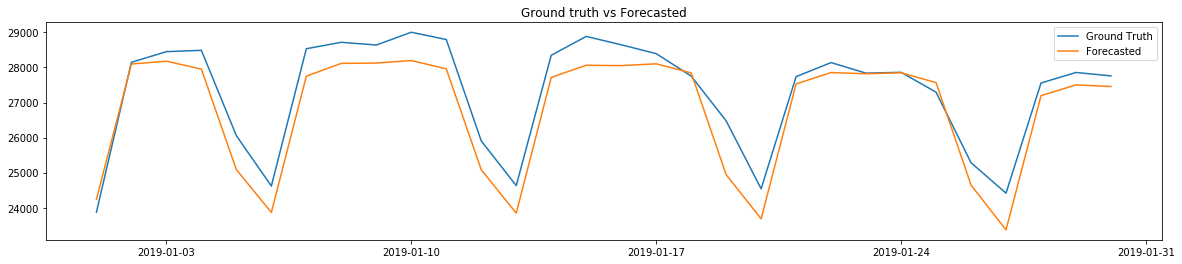

In [28]:
plt.figure(figsize=(20,4))
x_axis = pd.to_datetime(data_2019[0:30]['date'], format='%Y%m%d')
plt.plot_date(x_axis, data_2019[0:30]['peak_load'], '-')
plt.plot_date(x_axis, forecast['yhat'].tail(30), '-')
plt.title('Ground truth vs Forecasted')
plt.legend(['Ground Truth', 'Forecasted'])
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y_predicted, y_actual):
    return sqrt(mean_squared_error(y_actual, y_predicted))

### The RMSE score of the prediction

In [30]:
rmse(forecast['yhat'].tail(30), data_2019[0:30]['peak_load'])

646.7791430094558

### A more interesting one

We are trying to predict first 60 days of 2019

2019/02/03 to 2019/02/08 is the Chinese New Year and the model is recognizing the holiday effect

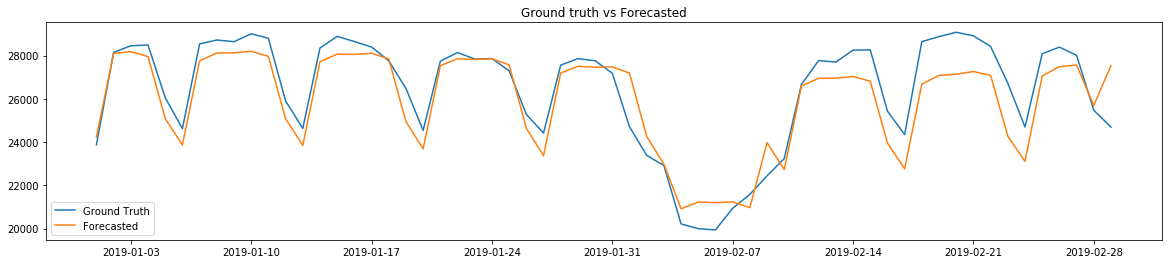

In [31]:
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

plt.figure(figsize=(20,4))
x_axis = pd.to_datetime(data_2019[0:60]['date'], format='%Y%m%d')
plt.plot_date(x_axis, data_2019[0:60]['peak_load'], '-')
plt.plot_date(x_axis, forecast['yhat'].tail(60), '-')
plt.title('Ground truth vs Forecasted')
plt.legend(['Ground Truth', 'Forecasted'])
plt.show()

### The RMSE score of the prediction

In [32]:
rmse(forecast['yhat'].tail(60), data_2019[0:60]['peak_load'])

1079.5636776831943

### Summary

This model is quite efficient since it can capture so many features and predict rather good results.

As we all know, the tempreture may have a huge impact on the peak load because we use our air conditioners extensively during hot days. This model doesn't take tempreture changes into consideration, maybe I will improve it someday and the result might get better.